In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

import pandas as pd
import numpy as np
import fbprophet as prophet

%matplotlib inline
plt.style.use('seaborn')

In [5]:
DATA = Path('./PriceData')
btc = pd.read_csv(DATA / 'Coinbase_BTCUSD_1h.csv')
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d %I-%p')

eth = pd.read_csv(DATA / 'Coinbase_ETHUSD_1h.csv')
eth['Date'] = pd.to_datetime(eth['Date'], format='%Y-%m-%d %I-%p')

ltc = pd.read_csv(DATA / 'Coinbase_LTCUSD_1h.csv')
ltc['Date'] = pd.to_datetime(ltc['Date'], format='%Y-%m-%d %I-%p')


In [6]:
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,2018-07-30 22:00:00,BTCUSD,8112.52,8199.99,8112.51,8163.01,545.56,4454633.33
1,2018-07-30 21:00:00,BTCUSD,8146.15,8150.00,8110.00,8112.52,210.88,1712630.83
2,2018-07-30 20:00:00,BTCUSD,8105.28,8178.00,8060.53,8146.15,726.42,5900438.14
3,2018-07-30 19:00:00,BTCUSD,7951.29,8130.00,7951.29,8105.28,911.42,7337428.44
4,2018-07-30 18:00:00,BTCUSD,7902.44,7963.33,7850.00,7951.29,1227.87,9713745.30


In [7]:
# prophet requires names in a different format
btc = btc.rename(columns={'Date':'ds', 'Close':'y'})

btc_prophet = prophet.Prophet(changepoint_prior_scale=0.15)
btc_prophet.fit(btc)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
# Make a future dataframe for 2 years
btc_forecast = btc_prophet.make_future_dataframe(periods=30, freq='D')
# Make predictions
btc_forecast = btc_prophet.predict(btc_forecast)

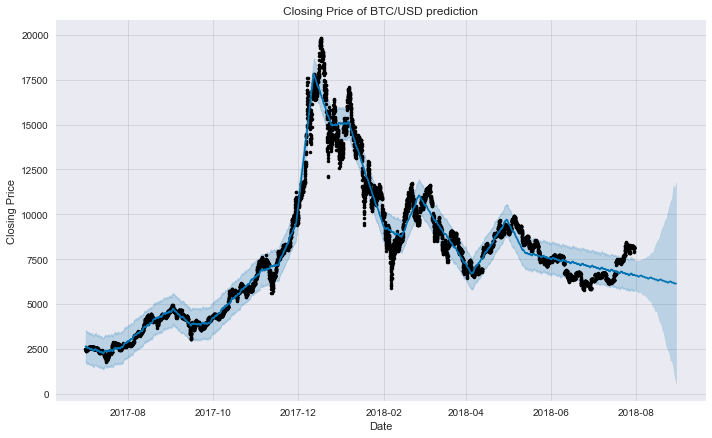

In [10]:
btc_prophet.plot(btc_forecast, xlabel = 'Date', ylabel = 'Closing Price')
plt.title('Closing Price of BTC/USD prediction');

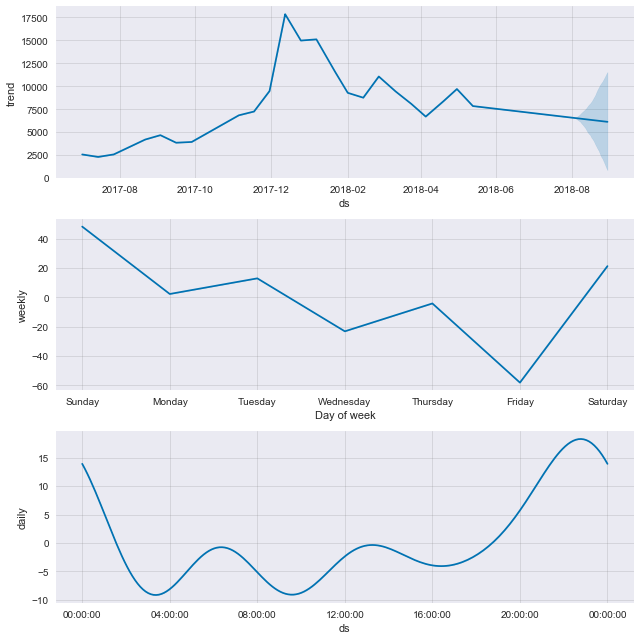

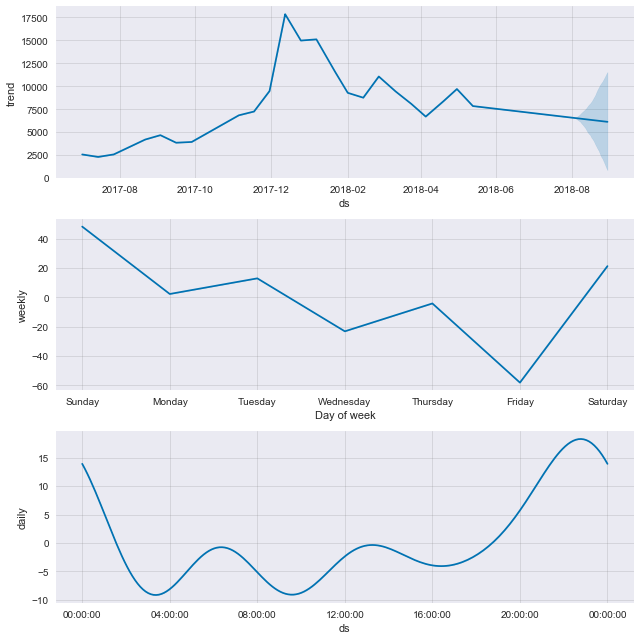

In [11]:
btc_prophet.plot_components(btc_forecast)